In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import FinanceDataReader as fdr

In [4]:
samsung = fdr.DataReader('005935')

In [5]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-18,76100,76600,74000,74600,6686244,-0.038660
2021-01-19,73800,76600,72300,76400,6559458,0.024129
2021-01-20,78900,78900,76600,76800,3008651,0.005236
2021-01-21,77500,77800,76800,77600,2512634,0.010417
2021-01-22,79000,79400,77600,77600,3006672,0.000000


In [6]:
apple = fdr.DataReader('AAPL')

In [7]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-01-15,127.14,128.78,130.22,127.00,111600000.0,-0.0137
2021-01-19,127.83,127.80,128.67,126.95,90760000.0,0.0054
2021-01-20,132.03,128.66,132.49,128.55,104320000.0,0.0329
2021-01-21,136.87,133.80,139.67,133.59,120530000.0,0.0367
2021-01-22,139.07,136.34,139.84,135.08,114460000.0,0.0161


In [8]:
btc = fdr.DataReader('BTC/KRW','2016-01-01')
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232
...,...,...,...,...,...,...
2021-01-19,39465000,39994000,40237000,39465000,1900.0,-0.0132
2021-01-20,39277000,39466000,39466000,38339000,2070.0,-0.0048
2021-01-21,34389000,39252000,39252000,34389000,5030.0,-0.1244


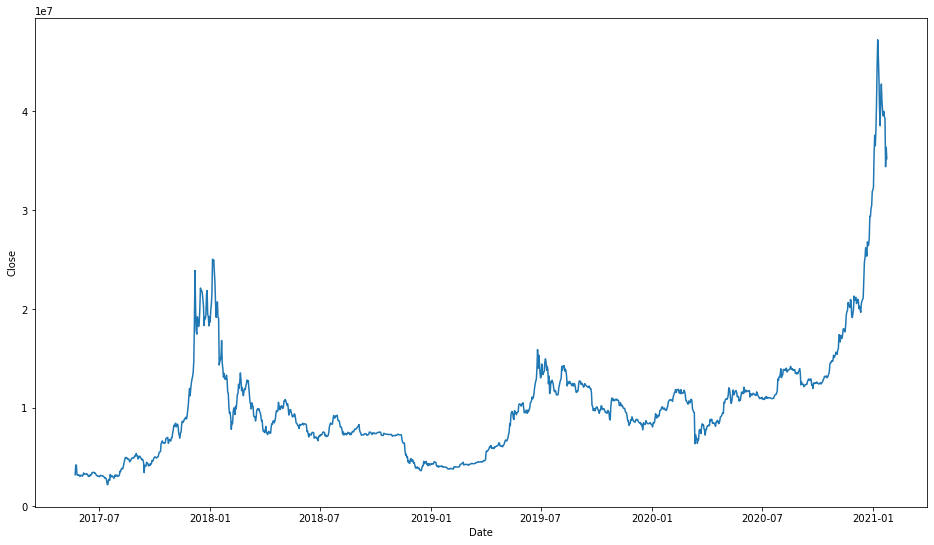

In [9]:
plt.figure(figsize=(16,9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

In [10]:
STOCK_CODE = '005935'

In [11]:
stock = fdr.DataReader(STOCK_CODE)

In [14]:
stock.index

DatetimeIndex(['1997-02-12', '1997-02-13', '1997-02-14', '1997-02-15',
               '1997-02-17', '1997-02-18', '1997-02-19', '1997-02-20',
               '1997-02-21', '1997-02-22',
               ...
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

Text(0, 0.5, 'price')

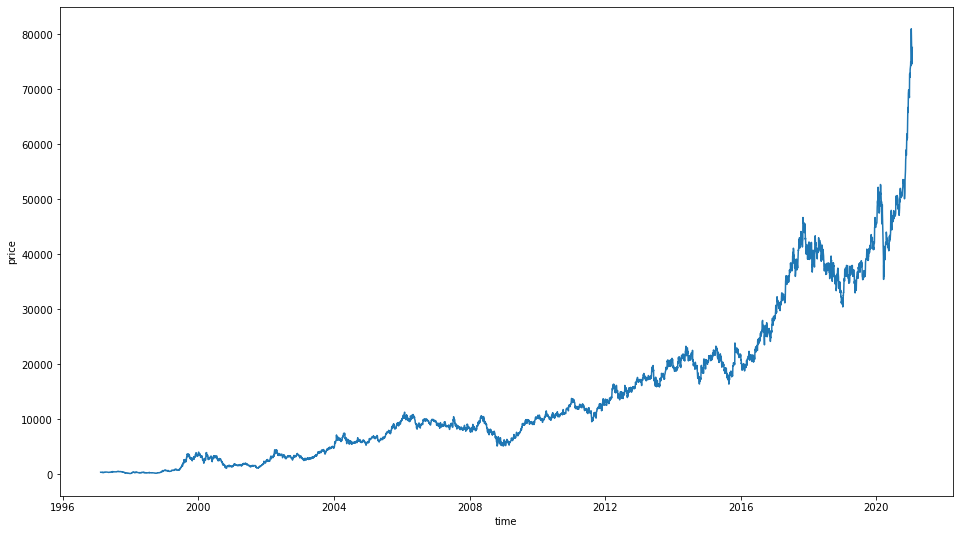

In [15]:
plt.figure(figsize=(16,9))
sns.lineplot(x=stock.index, y=stock['Close'])
plt.xlabel('time')
plt.ylabel('price')

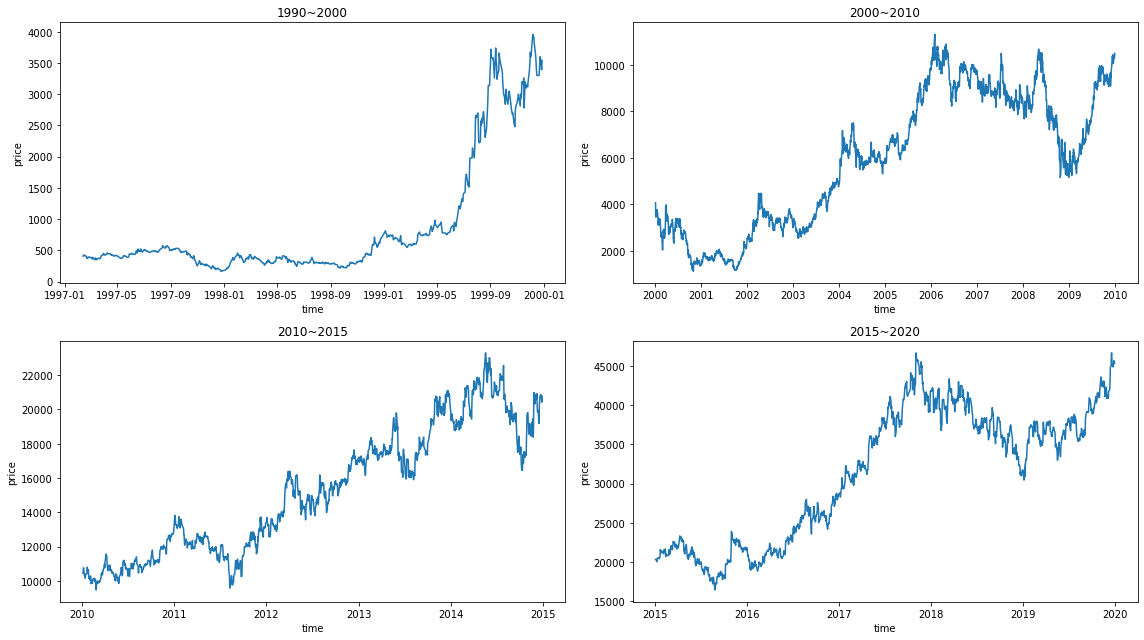

In [16]:
time_steps = [['1990','2000'],['2000','2010'],['2010','2015'],['2015','2020']]

fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x = df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [17]:
stock = fdr.DataReader(STOCK_CODE, '2020')

In [18]:
from fbprophet import Prophet

In [19]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [20]:
stock['y']= stock['Close']
stock['ds']= stock.index

In [21]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2020-01-02,45750,45950,45150,45600,1512362,0.004405,45600,2020-01-02
2020-01-03,46150,46600,45350,45650,1892001,0.001096,45650,2020-01-03
2020-01-06,44950,45700,44700,45700,1212706,0.001095,45700,2020-01-06
2020-01-07,45800,46600,45750,46300,1655637,0.013129,46300,2020-01-07
2020-01-08,46400,47500,45900,46700,3625223,0.008639,46700,2020-01-08


In [22]:
m = Prophet()
m.fit(stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods = 30)
future.tail()

,ds
288,2021-02-17
289,2021-02-18
290,2021-02-19
291,2021-02-20
292,2021-02-21


In [24]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
288,2021-02-17,88119.219179,86283.973913,91160.992353,87127.088110,89110.087524,589.726708,589.726708,589.726708,589.726708,589.726708,589.726708,0.0,0.0,0.0,88708.945886
289,2021-02-18,88445.691071,86685.202120,91434.348859,87390.261700,89504.287186,497.045217,497.045217,497.045217,497.045217,497.045217,497.045217,0.0,0.0,0.0,88942.736287
290,2021-02-19,88772.162963,86934.339386,91603.973395,87684.905494,89884.152155,451.998999,451.998999,451.998999,451.998999,451.998999,451.998999,0.0,0.0,0.0,89224.161962
291,2021-02-20,89098.634855,85551.473831,90278.346096,87929.518445,90287.195199,-1228.727286,-1228.727286,-1228.727286,-1228.727286,-1228.727286,-1228.727286,0.0,0.0,0.0,87869.907569
292,2021-02-21,89425.106747,85655.938790,90673.403910,88186.804150,90680.017197,-1228.727296,-1228.727296,-1228.727296,-1228.727296,-1228.727296,-1228.727296,0.0,0.0,0.0,88196.379451


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


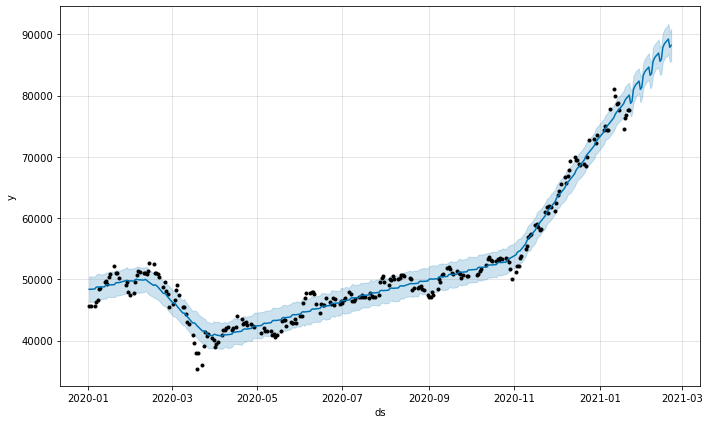

In [25]:
#3줄로 예측
m = Prophet()
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [26]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
253,2021-01-11,76384.190805,74266.326675,78421.409489
254,2021-01-12,76940.483082,74801.652824,78909.000657
255,2021-01-13,77282.429660,75284.940982,79315.428792
256,2021-01-14,77516.220061,75537.834920,79756.989043
257,2021-01-15,77797.645736,75764.171141,79894.955470
258,2021-01-18,78669.494050,76490.733004,80745.762691
259,2021-01-19,79225.786327,77176.038113,81413.782302
260,2021-01-20,79567.732905,77613.820423,81686.350492
261,2021-01-21,79801.523306,77682.253948,81948.322431
262,2021-01-22,80082.948981,78110.112739,82054.244960


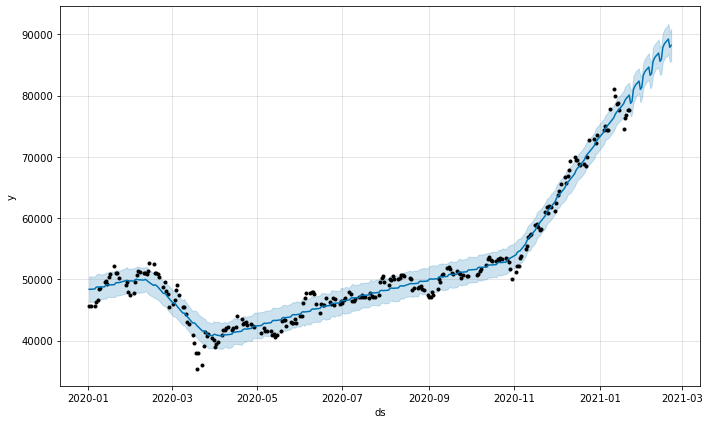

In [27]:
fig = m.plot(forecast)

In [28]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
fig = plot_plotly(m, forecast)
fig

In [35]:
plot_components_plotly(m, forecast)

In [31]:
from fbprophet.plot import add_changepoints_to_plot

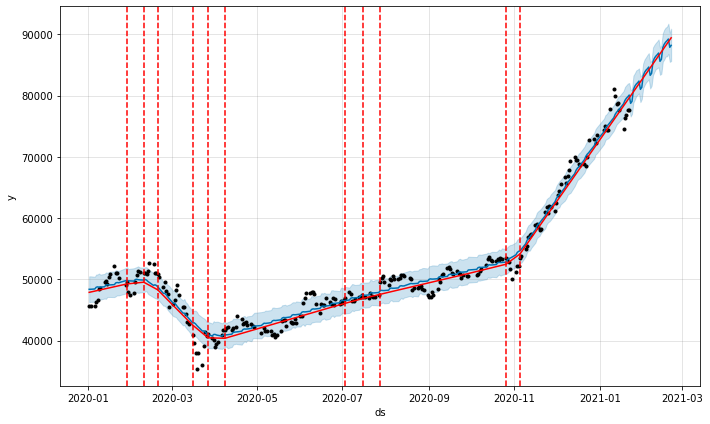

In [32]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Flexibility

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


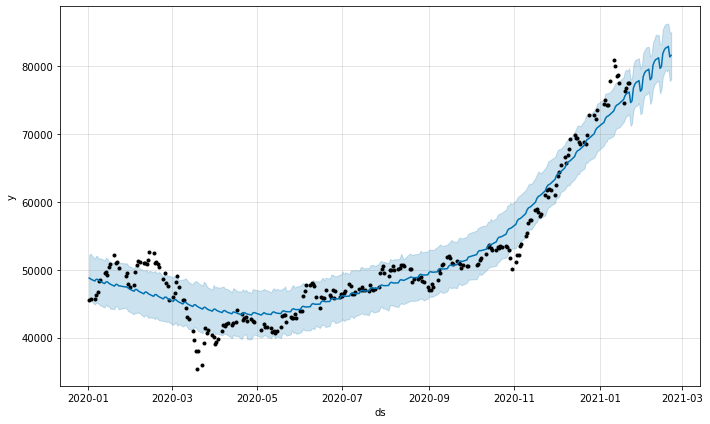

In [38]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


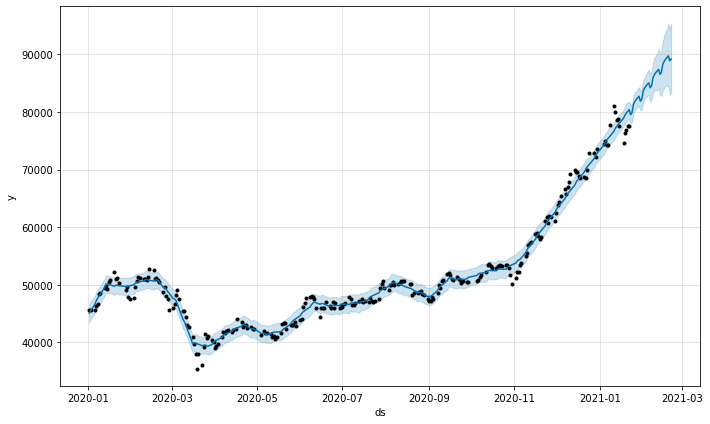

In [37]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)